In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
from drl_grams import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D

mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

# Genetic Algorithms

In the directory `genetic_algorithm_results/` the results obtained using genetic algorithms can be found. Different subdirectories represent different combinations of hyperparameters. First, we will study 20 samples obtained using three different fitness functions:

- **reward based**: emulates RL reward from [1], in the sense that it accumulates over time steps rewarding better fidelity and discounting for each extra step with a reward decay gamma to promote faster transmissions
- **natural based**: also accumulates over time steps but rewards a transmission that behaves in a similar way to the natural evolution. The *wave* propagates at a similar speed but tries to achieve a higher max probability.
- **ipr based**: rewards a localized transition, in the sense that it attempts to have a concentrated package

We also study two action sets:
- **Zhang actions**: Set of actions used in the original work of Zhang et al [1]
- **One Action Per Site**: Set of actions consisting of the N actions corresponding to a control site on each qubit plus the *zero* action which means not controlling any site.

Different subdirectories represent different combinations of hyperparameters. For example, the following 4 subdirectories include results correspoding to the two first described fitness functions for both action sets. 

In [2]:
rb_zhang = 'genetic_algorithm_results/rb_zhang/'   # Reward-based fitness function and Zhang et al actions
rb_oaps = 'genetic_algorithm_results/rb_oaps/'     # Reward-based fitness function and one action per site
lb_zhang = 'genetic_algorithm_results/lb_zhang/'   # Natural-based fitness function and Zhang et al actions
lb_oaps = 'genetic_algorithm_results/lb_oaps/'     # Natural-based fitness function and one action per site

directories = [rb_zhang, rb_oaps, lb_zhang, lb_oaps]

A summary of all the hyper-parameters and system parameters used to obtain each directory can be accesed by calling the `access_ga_params` function. For example, the output of the following cell shows the parameters corresponding to the directory `rb_zhang`, where we employ reward-based fitness and Zhang et al actions, which can be verified in the printed dataframe. 

In [3]:
rb_zhang_parameters = access_ga_params(rb_zhang,print_params=True)

Showing parameters for genetic_algorithm_results/rb_zhang/:
╒═══════════════════╤═══════════════════════╤══════════════╕
│ Section           │ Parameter             │ Value        │
╞═══════════════════╪═══════════════════════╪══════════════╡
│ system_parameters │ initial_n             │ 8            │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ final_n               │ 64           │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ n_step                │ 4            │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ dt                    │ 0.15         │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ b                     │ 100          │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ speed_fraction        │ 1.1          │
├───────────────────┼───────────────────────┼──────────────┤
│ ga_initialization │ num

We can also access a particular parameter value using `get_parameter_value`

In [4]:
for directory in directories:
    print('--------------------------------------------------')
    print('Directory: ', directory)
    print('--------------------------------------------------')
    ga_params = access_ga_params(directory,print_params=False)
    used_fitness = get_parameter_value(ga_params,'fitness_function',print_value=True)
    used_actions = get_parameter_value(ga_params,'action_set',print_value=True)


--------------------------------------------------
Directory:  genetic_algorithm_results/rb_zhang/
--------------------------------------------------
Parameter 'fitness_function' :  reward_based
Parameter 'action_set' :  zhang
--------------------------------------------------
Directory:  genetic_algorithm_results/rb_oaps/
--------------------------------------------------
Parameter 'fitness_function' :  reward_based
Parameter 'action_set' :  oaps
--------------------------------------------------
Directory:  genetic_algorithm_results/lb_zhang/
--------------------------------------------------
Parameter 'fitness_function' :  loc_based
Parameter 'action_set' :  zhang
--------------------------------------------------
Directory:  genetic_algorithm_results/lb_oaps/
--------------------------------------------------
Parameter 'fitness_function' :  loc_based
Parameter 'action_set' :  oaps


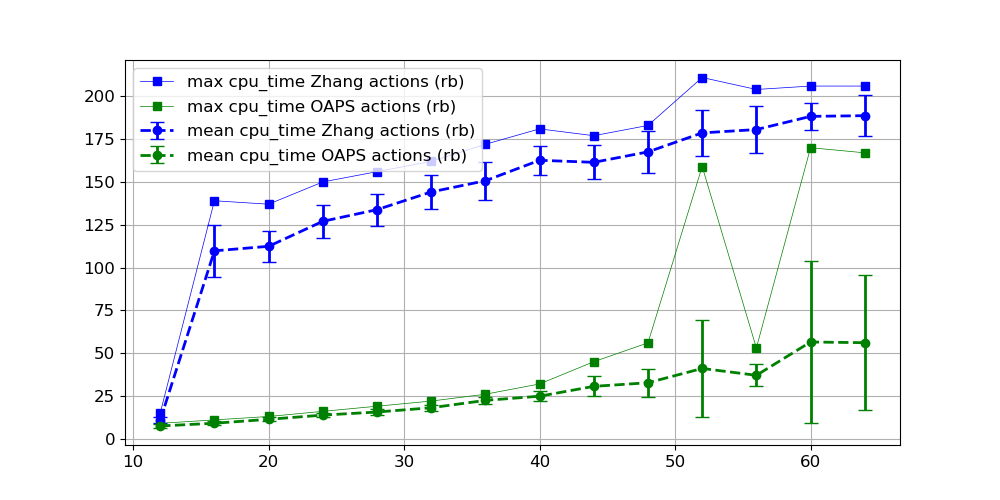

In [5]:
plt.figure(figsize=(10, 5))
plot_mean_max(directories[0:2],labels=[' cpu_time Zhang actions (rb)', ' cpu_time OAPS actions (rb)'],column='generations')
plt.grid()
plt.legend(loc='upper left')

In [6]:
get_different_parameters(directories,print_params=True)


Parameters with Different Values:
╒══════════════════╤══════════════════════════════════════╤═══════════════════════════════════════╤══════════════════════════════════════╤═══════════════════════════════════════╕
│ Parameter        │ genetic_algorithm_results/lb_oaps/   │ genetic_algorithm_results/lb_zhang/   │ genetic_algorithm_results/rb_oaps/   │ genetic_algorithm_results/rb_zhang/   │
╞══════════════════╪══════════════════════════════════════╪═══════════════════════════════════════╪══════════════════════════════════════╪═══════════════════════════════════════╡
│ action_set       │ oaps                                 │ zhang                                 │ oaps                                 │ zhang                                 │
├──────────────────┼──────────────────────────────────────┼───────────────────────────────────────┼──────────────────────────────────────┼───────────────────────────────────────┤
│ directory        │ lb_oaps                              │ lb_zhang  

Directory,genetic_algorithm_results/lb_oaps/,genetic_algorithm_results/lb_zhang/,genetic_algorithm_results/rb_oaps/,genetic_algorithm_results/rb_zhang/
Parameter,,,,
action_set,oaps,zhang,oaps,zhang
directory,lb_oaps,lb_zhang,rb_oaps,rb_zhang
fitness_function,loc_based,loc_based,reward_based,reward_based


We can analyze the obtained results for different combinations of fitness functions and rewards. The results file contains the following metrics: 

- `max_fidelity`: max. transmission probability
- `ttime`: time step for which the maximum transmission probability is achieved
- `cpu_time`: cpu time spent for that sample
- `generations` : number of genetic algorithm generations


['lb_oaps', 'lb_zhang', 'rb_oaps', 'rb_zhang']

Parameters with Different Values:
╒══════════════════╤══════════════════════════════════════╤═══════════════════════════════════════╤══════════════════════════════════════╤═══════════════════════════════════════╕
│ Parameter        │ genetic_algorithm_results/lb_oaps/   │ genetic_algorithm_results/lb_zhang/   │ genetic_algorithm_results/rb_oaps/   │ genetic_algorithm_results/rb_zhang/   │
╞══════════════════╪══════════════════════════════════════╪═══════════════════════════════════════╪══════════════════════════════════════╪═══════════════════════════════════════╡
│ action_set       │ oaps                                 │ zhang                                 │ oaps                                 │ zhang                                 │
├──────────────────┼──────────────────────────────────────┼───────────────────────────────────────┼──────────────────────────────────────┼───────────────────────────────────────┤
│ directory        │ lb

['lb_oaps', 'lb_zhang', 'rb_oaps', 'rb_zhang']

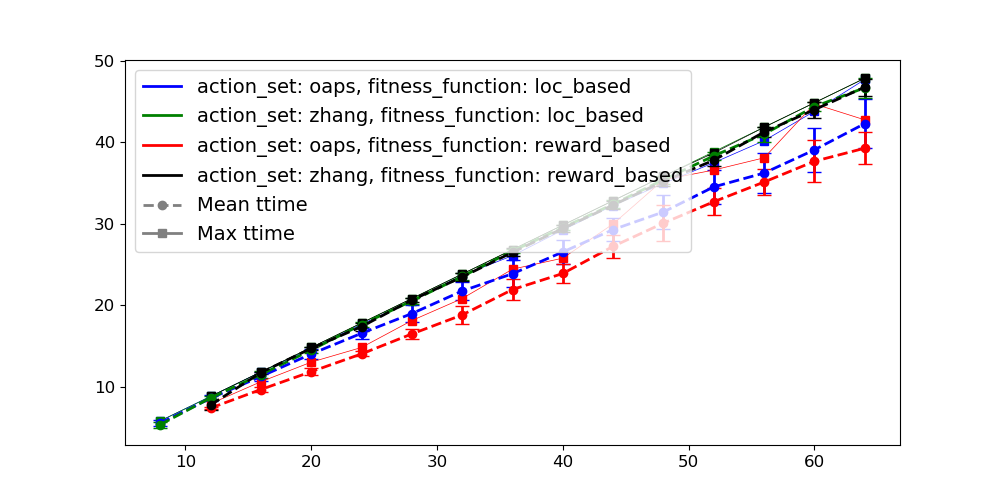

In [9]:
plt.figure(figsize=(10, 5))

plot_metric(directories,'ttime')

diff = get_different_parameters(directories,print_params=True)
diff.loc['directory'].values.tolist()

# Effect of different fitness functions

To study the effect of different fitness functions we can also study the behaviour of the transition probability over time.

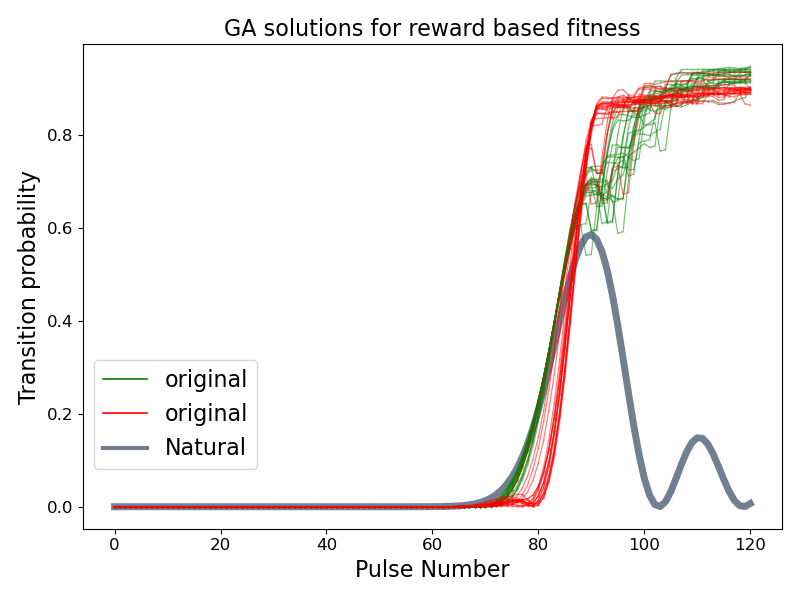

In [ ]:
plt.figure(figsize=(8, 6))
fs=16
plt.title('GA solutions for reward based fitness', fontsize=fs)
n=24
plot_ga_solutions([lb_zhang,rb_zhang],n,['original','original' ],['original','original'],add_natural=True,fs=16)
